# Anime Recommender System Project 2024

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Background](#sub_section_1_1_1)
        * [1.1.2 Problem Statement](#sub_section_1_1_2)
        * [1.1.3 Data Sourcing](#sub_section_1_1_3)
        * [1.1.4 Importance of the Study](#sub_section_1_1_4)
        * [1.1.5 Key Questions/Hypothesis](#sub_section_1_1_5)
        * [1.1.6 Aim](#sub_section_1_1_6)  
        * [1.1.7 Expected Outcomes](#sub_section_1_1_7)
    * [1.2 Project Objectives](#section_1_2)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Feature Extraction](#chapter6)
* <b>[7. Models](#chapter7)
* <b>[8. Conclusion](#chapter8)
* <b>[9. References](#chapter9)

## 1.1 Introduction

---
# 2. Importing Packages
The necessary packages were imported to facilitate data manipulation, data preprocessing, feature extraction, machine learning, model evaluation, and visualization. Warnings were also suppressed to ensure cleaner output.

In [9]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Define paths to your datasets in Google Drive
anime_path = '/content/drive/MyDrive/anime.csv'
train_path = '/content/drive/MyDrive/train.csv.zip'

In [11]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Loading Data
The data used for this project was located in the data folder in ().csv file format. To better manipulate and analyse the anime.csv and train.csv files, they were loaded into a Pandas Data Frame using the Pandas function, .read_csv() and referred to as df. For demonstrating the column index in the dataframe , index_col=False was implemented.

In [12]:
#Loading the dataset
anime = pd.read_csv(anime_path)
train = pd.read_csv(train_path)

<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the df.copy() method and referred to as `df_copy`.
</div>

In [20]:
# The copy of the dataframe
anime_copy = anime.copy()
train_copy = train.copy()

In [21]:
anime_copy.tail(10)

,anime_id,name,genre,type,episodes,rating,members
12284,26031,Super Erotic Anime,Hentai,OVA,2,4.45,118
12285,34399,Taimanin Asagi 3,"Demons, Hentai, Supernatural",OVA,Unknown,NaN,485
12286,10368,Teleclub no Himitsu,Hentai,OVA,2,4.67,148
12287,9352,Tenshi no Habataki Jun,Hentai,OVA,1,4.33,201
12288,5541,The Satisfaction,Hentai,OVA,1,4.37,166
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [22]:
train_copy.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


#### Data Summary

# 4. Data Cleaning <a class="anchor" id="chapter4"></a>

**Checking missing values**

Checking for missing values involves examining each column in the datasets to ensure completeness and data integrity. This ensures that all required data points are present, avoiding potential errors or biases in subsequent analyses or modeling tasks.

In [23]:
## Cleaning anime.csv
# Check for missing values
print(anime_copy.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [24]:
# Fill missing values
anime_copy['genre'].fillna('Unknown', inplace=True)
anime_copy['rating'].fillna(anime_copy['rating'].mean(), inplace=True)
anime_copy['episodes'].replace('Unknown', np.nan, inplace=True)
anime_copy['episodes'] = anime_copy['episodes'].astype(float)

In [25]:
## Cleaning train.csv
# Check for missing values
print(train_copy.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


In [26]:
# Replace -1 ratings with NaN
train_copy['rating'].replace(-1, np.nan, inplace=True)

----
# 5. Exploritory Data Analysis

In [31]:
## Summary statistics
print(anime_copy.describe())
print()
print(train_copy.describe())

           anime_id      episodes        rating       members
count  12294.000000  11954.000000  12294.000000  1.229400e+04
mean   14058.221653     12.382550      6.473902  1.807134e+04
std    11455.294701     46.865352      1.017096  5.482068e+04
min        1.000000      1.000000      1.670000  5.000000e+00
25%     3484.250000      1.000000      5.900000  2.250000e+02
50%    10260.500000      2.000000      6.550000  1.550000e+03
75%    24794.500000     12.000000      7.170000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06

            user_id      anime_id        rating
count  5.703555e+06  5.703555e+06  5.703555e+06
mean   3.674460e+04  8.902142e+03  7.808691e+00
std    2.101174e+04  8.882174e+03  1.572449e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.898500e+04  1.239000e+03  7.000000e+00
50%    3.680200e+04  6.213000e+03  8.000000e+00
75%    5.487300e+04  1.407500e+04  9.000000e+00
max    7.351600e+04  3.447500e+04  1.000000e+01


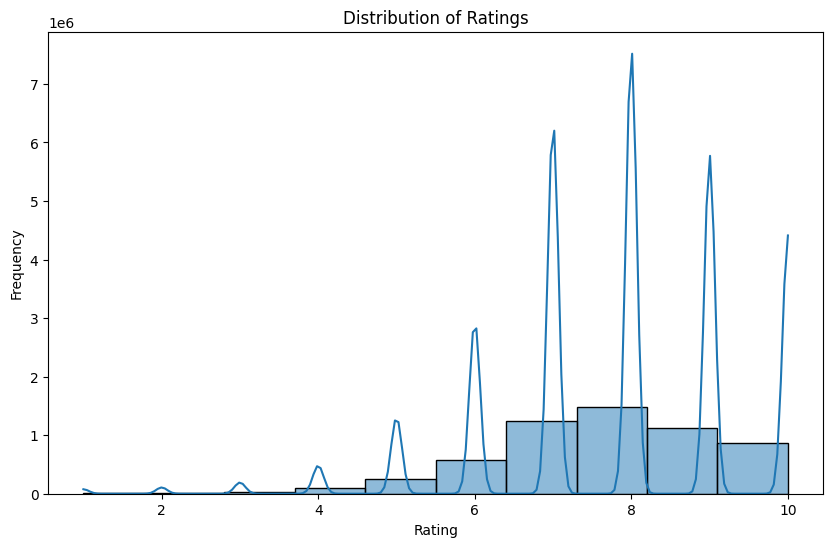

In [32]:
## Distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(train_copy['rating'].dropna(), bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

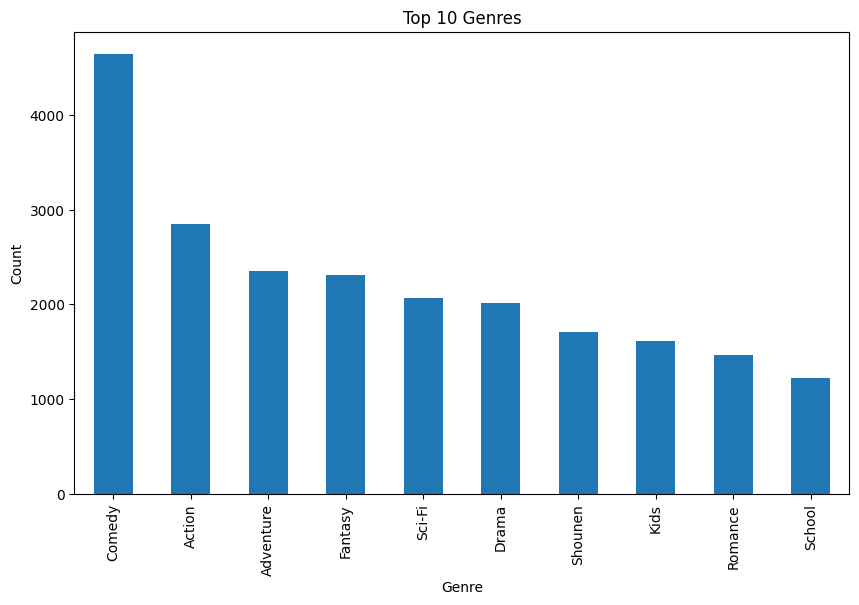

In [33]:
## Top 10 genres
top_genres = anime_copy['genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

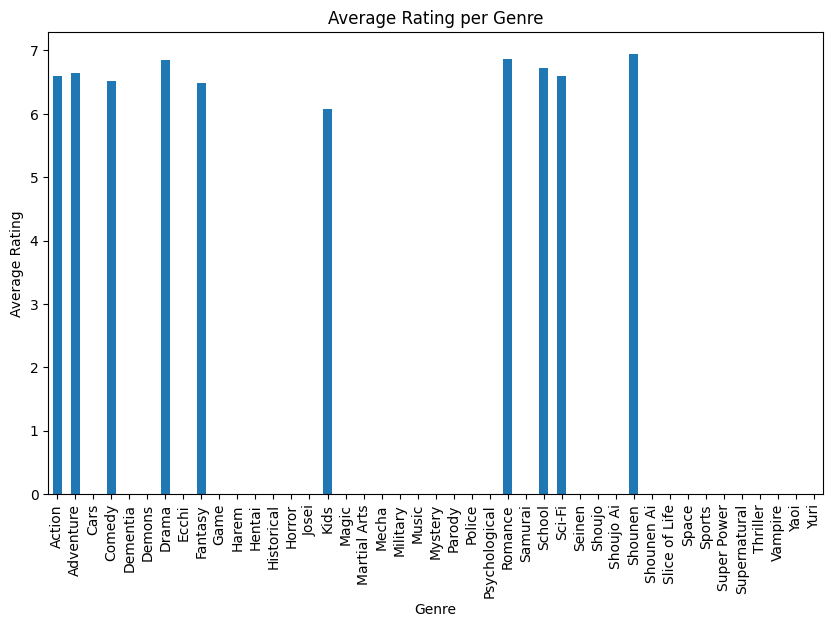

In [34]:
## Average rating per genre
genre_ratings = anime['genre'].str.get_dummies(sep=', ').mul(anime['rating'], axis=0).sum().sort_values(ascending=False) / top_genres
plt.figure(figsize=(10,6))
genre_ratings.plot(kind='bar')
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

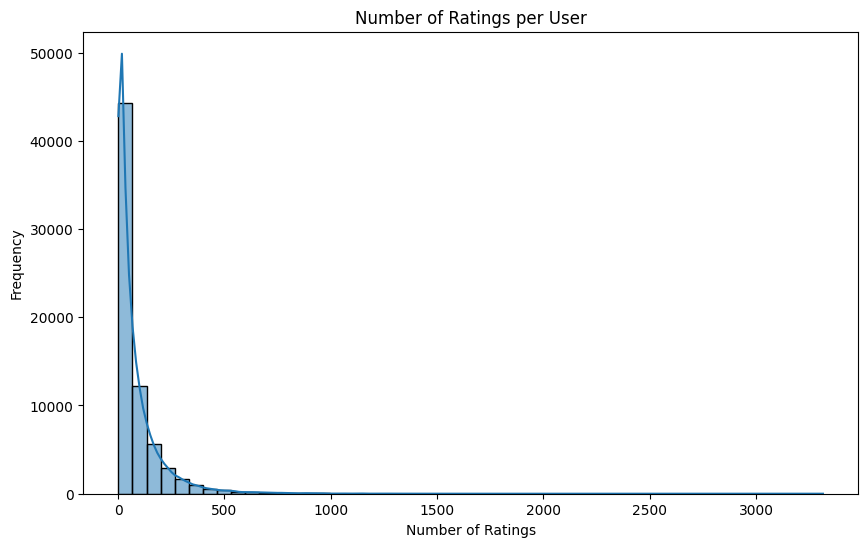

In [35]:
## User behavior analysis
# Number of ratings per user
user_ratings_count = train_copy.groupby('user_id').size()
plt.figure(figsize=(10,6))
sns.histplot(user_ratings_count, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


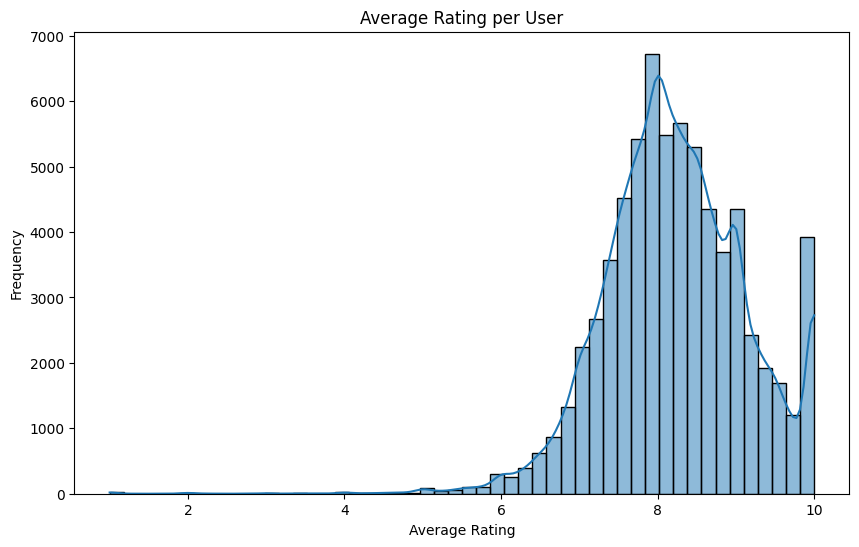

In [36]:
# Average rating per user
user_avg_rating = train_copy.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10,6))
sns.histplot(user_avg_rating, bins=50, kde=True)
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

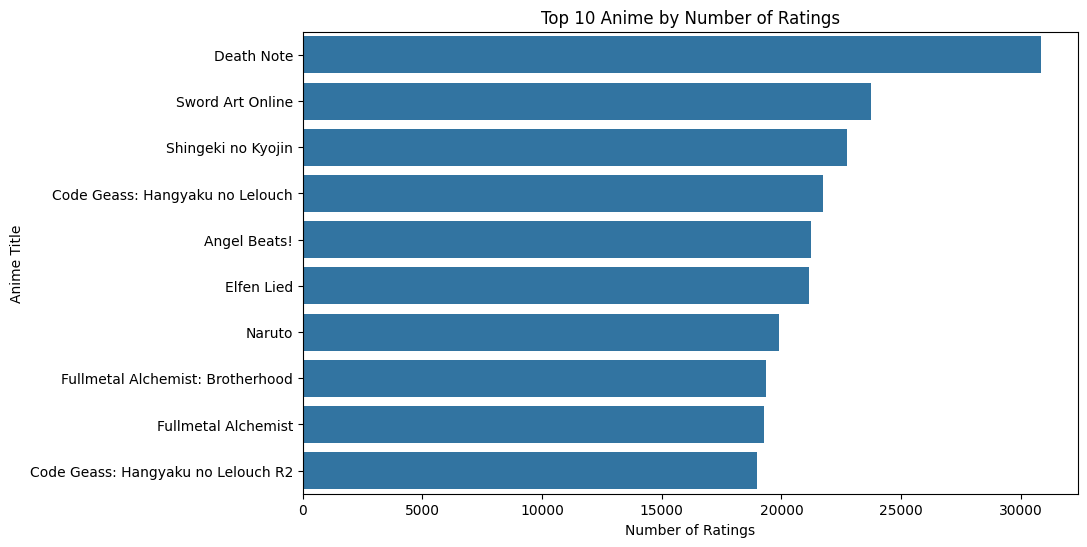

In [37]:
## Popular anime analysis
# Top 10 anime by number of ratings
top_anime_by_ratings = train_copy['anime_id'].value_counts().head(10)
top_anime_titles = anime_copy.set_index('anime_id').loc[top_anime_by_ratings.index]['name']
plt.figure(figsize=(10,6))
sns.barplot(y=top_anime_titles, x=top_anime_by_ratings, orient='h')
plt.title('Top 10 Anime by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Anime Title')
plt.show()

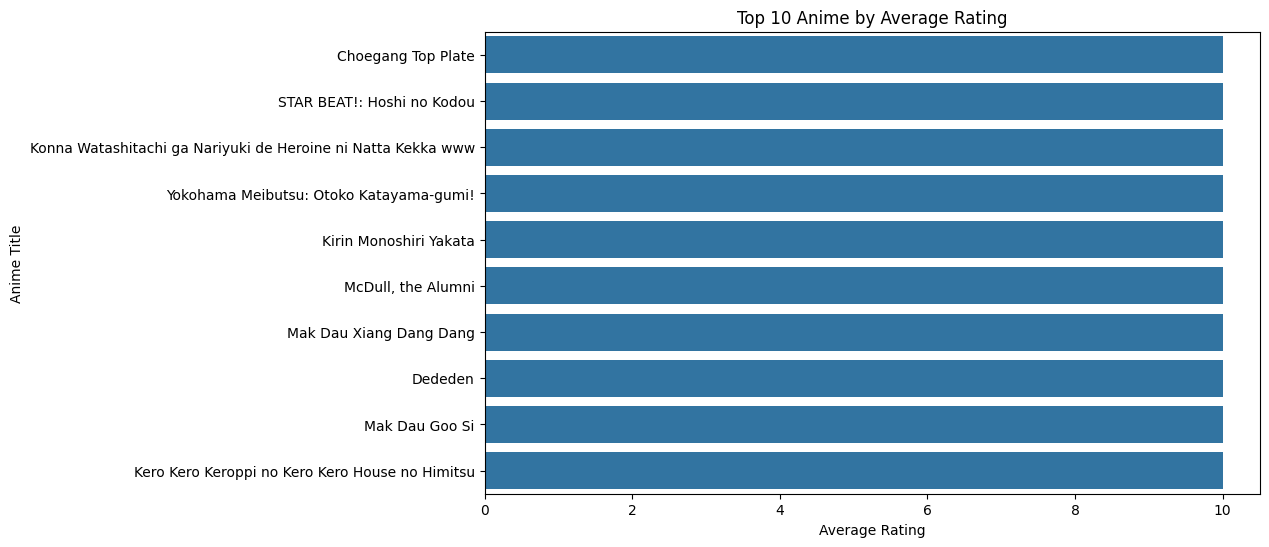

In [49]:
# Top 10 anime by average rating
top_anime_by_avg_rating = train_copy.groupby('anime_id')['rating'].mean().sort_values(ascending=False).head(10)
top_anime_titles_avg = anime_copy.set_index('anime_id').loc[top_anime_by_avg_rating.index]['name']
plt.figure(figsize=(10,6))
sns.barplot(y=top_anime_titles_avg, x=top_anime_by_avg_rating, orient='h')
plt.title('Top 10 Anime by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Anime Title')
plt.show()

In [39]:
## Correlation analysis
# Merge train and anime datasets for correlation analysis
merged_df = pd.merge(train_copy, anime_copy, on='anime_id', how='inner')

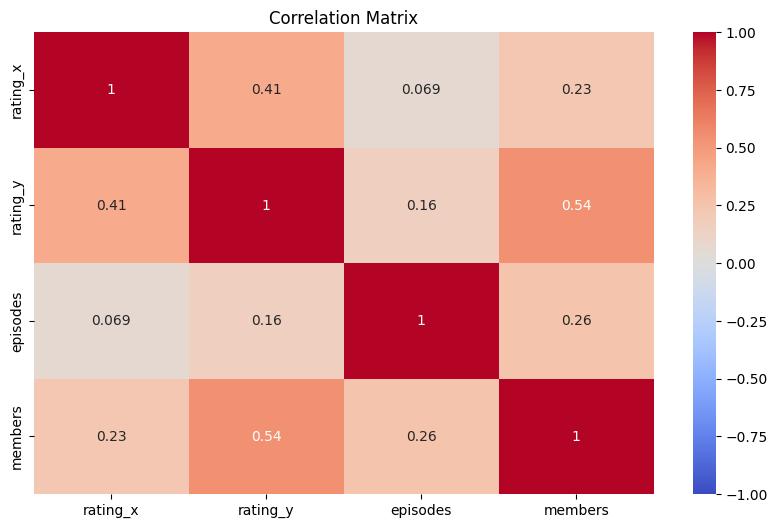

In [40]:
# Correlation matrix
corr_matrix = merged_df[['rating_x', 'rating_y', 'episodes', 'members']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


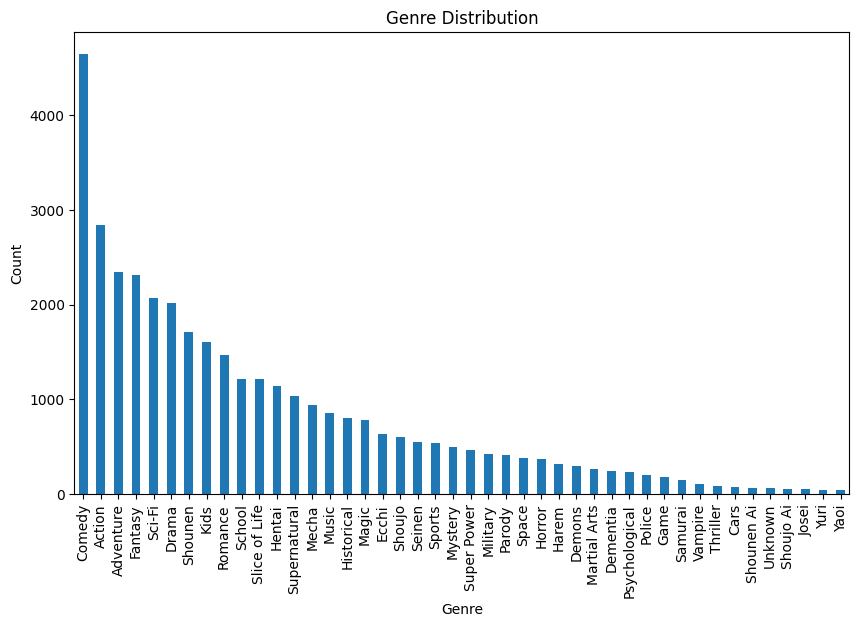

In [50]:
## Content-Based Filtering Analysis
# Analysis of genres
genre_count = anime_copy['genre'].str.get_dummies(sep=', ').sum()
plt.figure(figsize=(10,6))
genre_count.sort_values(ascending=False).plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

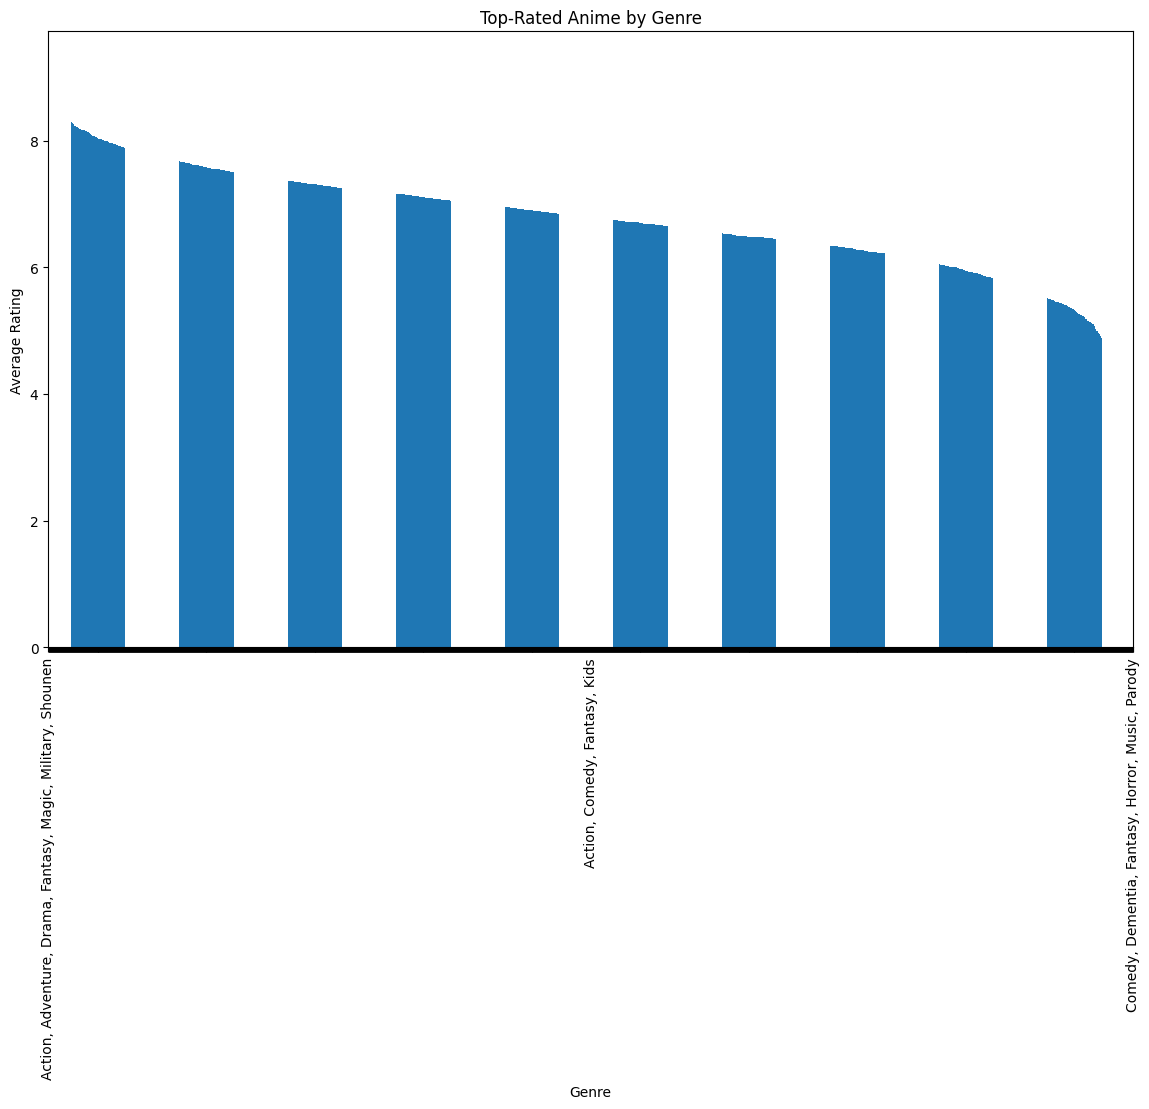

In [57]:
import matplotlib.pyplot as plt

# Top-rated anime by genre
genre_top_ratings = anime_copy.explode('genre')
top_genre_ratings = genre_top_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14,8))  # Increase figure size
ax = top_genre_ratings.plot(kind='bar')

# Set the x-axis labels
labels = ax.get_xticklabels()
n = len(labels)
for i, label in enumerate(labels):
    if i not in [0, n // 2, n - 1]:
        labels[i] = ''  # Hide all labels except the first, middle, and last

ax.set_xticklabels(labels)
plt.title('Top-Rated Anime by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

In [52]:
## Collaborative Filtering Analysis
# Number of unique users and anime
num_users = train_copy['user_id'].nunique()
num_anime = train_copy['anime_id'].nunique()
print(f'Number of unique users: {num_users}')
print(f'Number of unique anime: {num_anime}')

Number of unique users: 69481
Number of unique anime: 9838


In [1]:
# Aggregate duplicates by taking the mean rating for duplicate user-anime pairs
train_copy_agg = train_copy.groupby(['user_id', 'anime_id']).rating.mean().reset_index()

# User-item interaction matrix
interaction_matrix = train_copy_agg.pivot(index='user_id', columns='anime_id', values='rating')

print('User-Item Interaction Matrix:')
print(interaction_matrix.head())

NameError: name 'train_copy' is not defined

In [54]:
# Sparsity of the interaction matrix
sparsity = 1 - len(train_copy) / (num_users * num_anime)
print(f'Sparsity of the user-item interaction matrix: {sparsity:.4f}')

Sparsity of the user-item interaction matrix: 0.9917
